In [2]:
from PIL import Image
import matplotlib.pyplot as plt

def imOpen (imString):
  pic = Image.open(imString)
  return pic.convert("L")

In [8]:
def toStrH(img):
  sp = " "
  out = ""
  out = out + "H " + str(img.size[0]) + sp + str(img.size[1])
 
  ctr = 0
  for  i in  range( img.size[1]) :
    out =out + "\n"
    #print("hiii") 
    ctr = 0
    for j in range( img.size[0] - 1) :
      if (img.getpixel((j,i)) == img.getpixel((j+1,i))):
        ctr = ctr + 1
      else:
        out= out + str(img.getpixel((j,i))) + sp + str(j - ctr) + sp + str(j) + sp
        ctr = 0
      if (j == img.size[0]-2 and ctr != 0):
        out = out + str(img.getpixel((j,i))) + sp + str(j - ctr + 1) + sp + str(j + 1) + sp
        ctr = 0  
        
  return out


In [12]:
def toStrV(img):
  sp = " "
  out = ""
  out = out + "V " + str(img.size[0]) + sp + str(img.size[1])
  ctr = 0
  for x in range(  img.size[0]) :
    out = out + "\n" 
    ctr = 0
    for y in range(img.size[1] - 1 ):
      if (img.getpixel((x,y)) == img.getpixel((x,y+1))):
        ctr = ctr + 1
      else:
        out= out + str(img.getpixel((x,y))) + sp + str(y - ctr) + sp + str(y) + sp
        #print("heyy")
        ctr = 0
      if (y == img.size[1]-2 and ctr != 0):
        out = out + str(img.getpixel((x,y))) + sp + str(y - ctr + 1) + sp + str(y + 1) + sp
        #print("hiii")
        ctr = 0 
      
      #print("y:" +str(y))   
  
    
  return out


In [13]:
def toFile(fileName, string):
  file = open(fileName, "w")
  file.write(string)
  file.close()

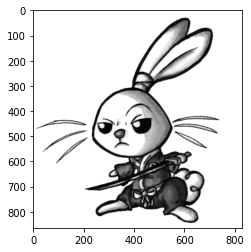

In [6]:
def toImg(imageString):
  stringawy= imageString
  file = open(stringawy, "r")
  imageString = file.read()
  imageArray = imageString.splitlines()
  header = imageArray[0]
  encodeType = header.split()[0]
  width = (int)(header.split()[1])
  height = (int)(header.split()[2])
  outImage = Image.new('L', (width,height))
  for i in range (1,len(imageArray)):
    imageStringLine= imageArray[i].split()
  
    for j in range (0,len(imageStringLine)):

      if (j % 3) == 0:
        color = int(imageStringLine[j])
        startPixel = int(imageStringLine [j+1])
        endPixel = int(imageStringLine [j+ 2])

      for k in range (startPixel,endPixel+1):

         if (encodeType == "H"):
            outImage.putpixel((k,i-1), color)
         else:
            outImage.putpixel((i-1,k), color)

  return outImage

In [14]:
barsImage = imOpen("Bars.bmp")
bars2Image = imOpen("Bars2.bmp")
rlcH1 = toStrH(barsImage)
rlcH2 = toStrH(bars2Image)
rlcV1 = toStrV(barsImage)
rlcV2 = toStrV(bars2Image)

toFile("H1.txt", rlcH1)
toFile("H2.txt", rlcH2)
toFile("V1.txt", rlcV1)
toFile("V2.txt", rlcV2)

print("Number of chars including white spaces")
print("Bars Horizontal RLC: "+ str(len(rlcH1)))
print("Bars Vertical RLC: "+ str(len(rlcV1)))
print("Bars2 Horizontal RLC: "+ str(len(rlcH2)))
print("Bars2 Vertical RLC: "+ str(len(rlcV2)))
print("")
print("Number of chars without white spaces")
print("Bars Horizontal RLC: "+ str(len(rlcH1)-rlcH1.count(" ")))
print("Bars Vertical RLC: "+ str(len(rlcV1)-rlcV1.count(" ")))
print("Bars2 Horizontal RLC: "+ str(len(rlcH2)-rlcH2.count(" ")))
print("Bars2 Vertical RLC: "+ str(len(rlcV2)-rlcV2.count(" ")))

Number of chars including white spaces
Bars Horizontal RLC: 246010
Bars Vertical RLC: 12497
Bars2 Horizontal RLC: 3177
Bars2 Vertical RLC: 1618509

Number of chars without white spaces
Bars Horizontal RLC: 183032
Bars Vertical RLC: 8931
Bars2 Horizontal RLC: 2275
Bars2 Vertical RLC: 1170007


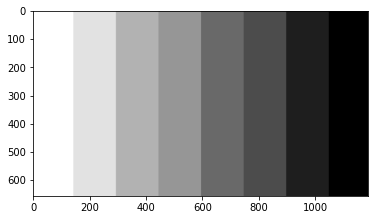

In [15]:
test1 = toImg("H1.txt")
plt.imshow(test1, cmap="gray")

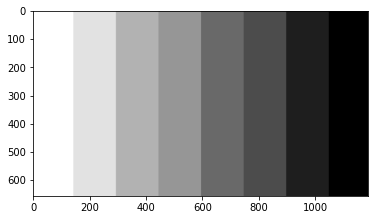

In [16]:
test2 = toImg("V1.txt")
plt.imshow(test2, cmap='gray')

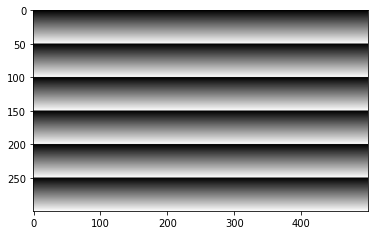

In [17]:
test3 = toImg("H2.txt")
plt.imshow(test3, cmap='gray')

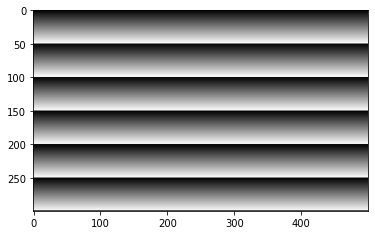

In [18]:
test4 = toImg("V2.txt")
plt.imshow(test4, cmap='gray')

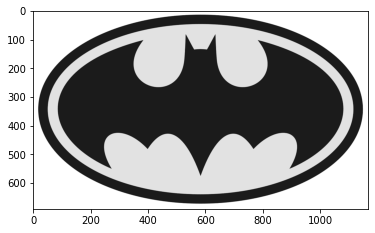

In [9]:
mystery1 = toImg("Mystery1.txt")
plt.imshow(mystery1, cmap="gray")

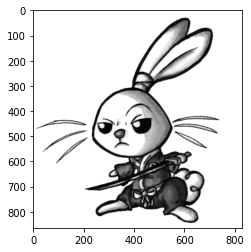

In [19]:
mystery2 = toImg("Mystery2.txt")
plt.imshow(mystery2, cmap="gray")
